In [1]:
# importing all the libaries

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from IPython.display import HTML

### 1.Data Processing 

In [2]:
# This will load the data set
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [3]:
# put data into pnada datafeatures/dataframes
features = pd.DataFrame(boston.data,columns=boston.feature_names)
features


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
features['AGE']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [5]:
#storing target values in target variable

target = pd.DataFrame(boston.target,columns=['target'])
target


,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [6]:
# concatente target and features in single dataframe
#axis=1 makes column wise concatenation

In [7]:
df =pd.concat([features,target],axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [8]:
#Data decription and visualization
#use round(decimale=2) to set the precision to 2 decimal places

df.describe().round(decimals=2)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


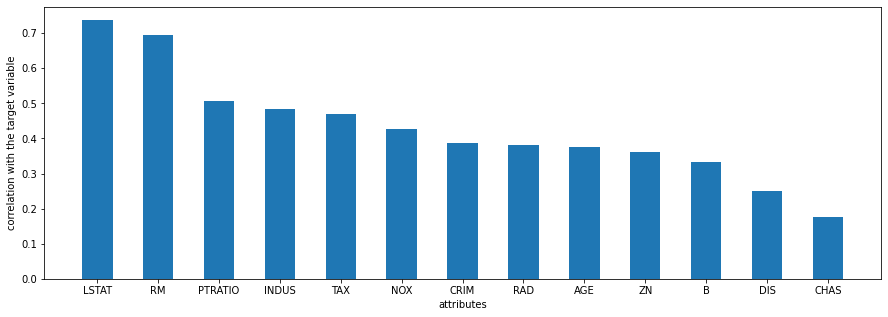

In [18]:
#calculate correlation between every colunm of data
#correlation between target and attributes
#correlation is stastical technique that can show whether and how
#sreongly pairs of variables are related

corr = df.corr('pearson')

#take absolute value of correlations
corrs = [abs(corr[attr]['target']) for attr in list(features)]
#make a lsit of pairs(corr,features)
l = list(zip(corrs, list(features)))

# sort the lsit in reverse order
l.sort(key =lambda x :x[0],reverse =True)

# #unzip pairs of two lists
corrs,labels = list(zip(*l))
#plot correlation with respect to the target variable as a bargraph
index = np.arange(len(labels))

plt.figure(figsize=(15,5))
plt.bar(index, corrs,width=0.5)
plt.xlabel('attributes')
plt.ylabel('correlation with the target variable')
plt.xticks(index,labels)
plt.show()


### Normalization of data


In [19]:
X=df['LSTAT'].values
Y= df['target'].values


In [23]:
#beofre normalization
print(Y[:5])

[24.  21.6 34.7 33.4 36.2]


In [24]:
x_scaler =MinMaxScaler()
X=x_scaler.fit_transform(X.reshape(-1, 1))
X=X[:, -1]
y_scaler =MinMaxScaler()
Y=y_scaler.fit_transform(Y.reshape(-1, 1))
Y=Y[:, -1]

In [25]:
print(Y[:5])


[0.42222222 0.36888889 0.66       0.63111111 0.69333333]


### Spliting data from data set for training and testing

In [26]:
#0.2 is 20% data is randomely sampled as testing data

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)


### Building model

In [27]:
def error(m, c, x, t):
    N=x.size
    e =sum(((m*x+c) -t) **2)
    return e *1/(2 * N)


In [28]:
def update(m, c, x, t, learning_rate):
    grad_m =sum(2* ((m * x + c) -t)* x)
    grad_c =sum(2* ((m * x + c) -t))
    m= m-grad_m * learning_rate
    c= c-grad_c * learning_rate
    return m, c

In [29]:
def gradient_decent(init_m, init_c, x, t, learning_rate, iterations, error_threshold):
    m=init_m
    c=init_c
    error_values = list()
    mc_values= list()
    for i in range (iterations):
        e= error(m, c, x, t)
        if e < error_threshold:
            print('error less than threshold,stopping error gadient decent')
            break
        error_values.append(e)
        m,c = update(m, c, x, t, learning_rate)
        mc_values.append((m, c))
    return m, c, error_values, mc_values

In [30]:
# time
init_m =0.09
init_c= 0
learning_rate =0.001
iterations = 250
error_threshold= 0.001

m,c, error_values, mc_values =gradient_decent (init_m, init_c, xtrain, ytrain, learning_rate, iterations, error_threshold)


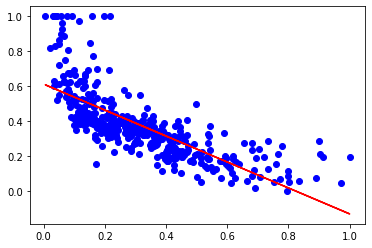

In [31]:
plt.scatter(xtrain, ytrain, color ='b')
plt.plot(xtrain, (m * xtrain +c) , color ='r')


In [32]:
# preciction
predicted_y = (m * xtest)+c



In [33]:
#compute MSE for the predicted values on testing set

mean_squared_error(ytest, predicted_y)

0.022585092489376648

In [34]:
p = pd.DataFrame(list(zip(xtest, ytest, predicted_y)), columns=['X', 'target_y', 'predicted_y'])
p.head()

,X,target_y,predicted_y
0,0.248620,0.400000,0.426043
1,0.461645,0.300000,0.267633
2,0.081126,0.411111,0.550596
3,0.605960,0.180000,0.160316
4,0.323124,0.222222,0.370640


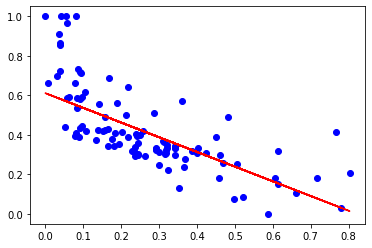

In [35]:
plt.scatter(xtest, ytest, color ='b')
plt.plot(xtest, predicted_y, color ='r')

In [36]:
#reshape tp change the shape that is required by thr scaler
predicted_y = np.array(predicted_y).reshape(-1, 1)

In [38]:
# Revert normaalization to obtian the predicted price house
#reshape concert pricess to usd $ 1000

predicted_y= predicted_y.reshape(-1,1)
xtest =xtest.reshape(-1,1)
ytest =ytest.reshape(-1,1)

xtest_scaled = x_scaler.inverse_transform(xtest)
ytest_scaled = y_scaler.inverse_transform(ytest)
predicted_y_scaled = y_scaler.inverse_transform(predicted_y)


# this is to remove extra dimension

xtest_scaled = xtest_scaled [:,-1]
ytest_scaled = ytest_scaled [:,-1]
predicted_y_scaled = predicted_y_scaled [:,-1]

p = pd.DataFrame(list(zip(xtest_scaled, ytest_scaled, predicted_y_scaled)), columns=['X', 'target_y', 'predicted_y'])
p= p.round(decimals =2)
p.head()


,X,target_y,predicted_y
0,10.74,23.0,24.17
1,18.46,18.5,17.04
2,4.67,23.5,29.78
3,23.69,13.1,12.21
4,13.44,15.0,21.68
